In [2]:
from mypgm.base import Factor, CPD, RandomVar
from mypgm.exacted import ExpectedUtility, ArcInversion
from mypgm.pgms import InfluenceDiagram

In [3]:
A = RandomVar('CT Results', k=3)
B = RandomVar('Mediastinal Metastases', k=2)
C = RandomVar('Mediastinoscopy Results', k=3)
D = RandomVar('Treatments Death', k=2) #survive/died
E = RandomVar('Mediastinoscopy Death', k=2) #survive/died

F = RandomVar('CT', k=2, mod='decision')
G = RandomVar('Treatment', k=2, mod='decision') #thoracotomy/radio
H = RandomVar('Mediastinoscopy?', k=2, mod='decision')

cA_FB = Factor([A, F, B], values=[0, 0,  0.19, 0.82, 0, 0, 0.81, 0.18, 1, 1, 0, 0])
#cA_FB.to_dataframe()
cB = Factor([B], [0.52, 0.46])
cC_BH = Factor([C, B, H], [0, 0, 0.005, 0.82, 0, 0, 0.995, 0.18, 1, 1, 0, 0])
cD_G = Factor([D, G], [0.963,  0.998, 0.037, 0.002])
cE_H = Factor([E, H], [1, 0.995, 0, 0.005])

dF = Factor([F])
dG = Factor([G, A, C, E, F, H])
dH = Factor([H, A, F])
# important: no forgetting arcs in decision also for utility node
LifeExperience = Factor([E, D, G, B, F, H], [4.45, 4.45, 4.45, 1.8, 1.8, 1.8, 2.64, 2.64, 2.64, 1.8, 1.8, 1.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], mod='utility')
#LifeExperience.to_dataframe()
dg = InfluenceDiagram([cA_FB, cC_BH, cD_G, cE_H, cB], [LifeExperience], [dF, dG, dH])

In [5]:
LifeExperience.to_dataframe()

,"Treatments Death=0,Treatment=0,Mediastinal Metastases=0,CT=0,Mediastinoscopy?=0","Treatments Death=0,Treatment=0,Mediastinal Metastases=0,CT=0,Mediastinoscopy?=1","Treatments Death=0,Treatment=0,Mediastinal Metastases=0,CT=1,Mediastinoscopy?=0","Treatments Death=0,Treatment=0,Mediastinal Metastases=0,CT=1,Mediastinoscopy?=1","Treatments Death=0,Treatment=0,Mediastinal Metastases=1,CT=0,Mediastinoscopy?=0","Treatments Death=0,Treatment=0,Mediastinal Metastases=1,CT=0,Mediastinoscopy?=1","Treatments Death=0,Treatment=0,Mediastinal Metastases=1,CT=1,Mediastinoscopy?=0","Treatments Death=0,Treatment=0,Mediastinal Metastases=1,CT=1,Mediastinoscopy?=1","Treatments Death=0,Treatment=1,Mediastinal Metastases=0,CT=0,Mediastinoscopy?=0","Treatments Death=0,Treatment=1,Mediastinal Metastases=0,CT=0,Mediastinoscopy?=1",...,"Treatments Death=1,Treatment=0,Mediastinal Metastases=1,CT=1,Mediastinoscopy?=0","Treatments Death=1,Treatment=0,Mediastinal Metastases=1,CT=1,Mediastinoscopy?=1","Treatments Death=1,Treatment=1,Mediastinal Metastases=0,CT=0,Mediastinoscopy?=0","Treatments Death=1,Treatment=1,Mediastinal Metastases=0,CT=0,Mediastinoscopy?=1","Treatments Death=1,Treatment=1,Mediastinal Metastases=0,CT=1,Mediastinoscopy?=0","Treatments Death=1,Treatment=1,Mediastinal Metastases=0,CT=1,Mediastinoscopy?=1","Treatments Death=1,Treatment=1,Mediastinal Metastases=1,CT=0,Mediastinoscopy?=0","Treatments Death=1,Treatment=1,Mediastinal Metastases=1,CT=0,Mediastinoscopy?=1","Treatments Death=1,Treatment=1,Mediastinal Metastases=1,CT=1,Mediastinoscopy?=0","Treatments Death=1,Treatment=1,Mediastinal Metastases=1,CT=1,Mediastinoscopy?=1"
Mediastinoscopy Death,,,,,,,,,,,,,,,,,,,,,
0,4.45,4.45,4.45,1.8,1.8,1.8,2.64,2.64,2.64,1.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


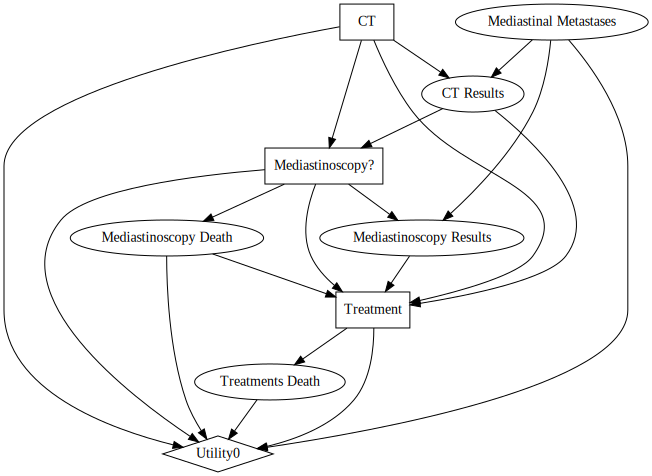

In [3]:
dg.viz()

In [5]:
ai = ArcInversion(dg)

In [6]:
ai.solve()

Regular ID
Start:
Chance node to remove: Treatments Death
Removed chance node: Treatments Death
Chance node to remove: None
Decision node to remove: None
[Treatment, Mediastinoscopy?]
[Treatment]
['u0', Treatment]
[CT Results, Mediastinoscopy Results, 'u0']
Node to reverse: Mediastinal Metastases
Arc reversed for: Mediastinal Metastases
Arc reversed for: Mediastinal Metastases
Removed node: Mediastinal Metastases
Chance node to remove: None
Decision node to remove: Treatment
Removed decision node: Treatment
Chance node to remove: Mediastinoscopy Results
Removed chance node: Mediastinoscopy Results
Chance node to remove: Mediastinoscopy Death
Removed chance node: Mediastinoscopy Death
Chance node to remove: None
Decision node to remove: Mediastinoscopy?
Removed decision node: Mediastinoscopy?
Chance node to remove: CT Results
Removed chance node: CT Results
Chance node to remove: None
Decision node to remove: CT
Removed decision node: CT


(<mypgm.pgms.InfluenceDiagram at 0x12fe2f750>,
 [Treatment CT Results Mediastinoscopy Results Mediastinoscopy Death CT Mediastinoscopy? 
  (0, 0, 0, 0, 0, 0) -> 1.0
  (0, 0, 0, 0, 0, 1) -> 1.0
  (0, 0, 0, 0, 1, 0) -> 1.0
  (0, 0, 0, 0, 1, 1) -> 1.0
  (0, 0, 0, 1, 0, 0) -> 1.0
  (0, 0, 0, 1, 0, 1) -> 1.0
  (0, 0, 0, 1, 1, 0) -> 1.0
  (0, 0, 0, 1, 1, 1) -> 1.0
  (0, 0, 1, 0, 0, 0) -> 1.0
  (0, 0, 1, 0, 0, 1) -> 1.0
  (0, 0, 1, 0, 1, 0) -> 1.0
  (0, 0, 1, 0, 1, 1) -> 1.0
  (0, 0, 1, 1, 0, 0) -> 1.0
  (0, 0, 1, 1, 0, 1) -> 1.0
  (0, 0, 1, 1, 1, 0) -> 1.0
  (0, 0, 1, 1, 1, 1) -> 1.0
  (0, 0, 2, 0, 0, 0) -> 1.0
  (0, 0, 2, 0, 0, 1) -> 1.0
  (0, 0, 2, 0, 1, 0) -> 1.0
  (0, 0, 2, 0, 1, 1) -> 0.0
  (0, 0, 2, 1, 0, 0) -> 1.0
  (0, 0, 2, 1, 0, 1) -> 1.0
  (0, 0, 2, 1, 1, 0) -> 1.0
  (0, 0, 2, 1, 1, 1) -> 1.0
  (0, 1, 0, 0, 0, 0) -> 1.0
  (0, 1, 0, 0, 0, 1) -> 1.0
  (0, 1, 0, 0, 1, 0) -> 1.0
  (0, 1, 0, 0, 1, 1) -> 1.0
  (0, 1, 0, 1, 0, 0) -> 1.0
  (0, 1, 0, 1, 0, 1) -> 1.0
  (0, 1, 0, 1, 1, 0) ->

In [7]:
ai.gained_utility

[CT 
 (0,) -> 3.0093750000000004
 (1,) -> 3.413835]

In [7]:
model.chance_factors

[CT Results CT Mediastinal Metastases 
 (0, 0, 0) -> 0.0
 (0, 0, 1) -> 0.0
 (0, 1, 0) -> 0.19
 (0, 1, 1) -> 0.82
 (1, 0, 0) -> 0.0
 (1, 0, 1) -> 0.0
 (1, 1, 0) -> 0.81
 (1, 1, 1) -> 0.18
 (2, 0, 0) -> 1.0
 (2, 0, 1) -> 1.0
 (2, 1, 0) -> 0.0
 (2, 1, 1) -> 0.0,
 Mediastinoscopy Results Mediastinal Metastases Mediastinoscopy? 
 (0, 0, 0) -> 0.0
 (0, 0, 1) -> 0.0
 (0, 1, 0) -> 0.005
 (0, 1, 1) -> 0.82
 (1, 0, 0) -> 0.0
 (1, 0, 1) -> 0.0
 (1, 1, 0) -> 0.995
 (1, 1, 1) -> 0.18
 (2, 0, 0) -> 1.0
 (2, 0, 1) -> 1.0
 (2, 1, 0) -> 0.0
 (2, 1, 1) -> 0.0,
 Mediastinoscopy Death Mediastinoscopy? 
 (0, 0) -> 1.0
 (0, 1) -> 0.995
 (1, 0) -> 0.0
 (1, 1) -> 0.005,
 Mediastinal Metastases 
 (0,) -> 0.52
 (1,) -> 0.46]

In [8]:
print(ai.find_decision_node(model))

None


In [24]:
to_remove = ai.find_decision_node(model)
if to_remove is not None:
    model, decision = ai.remove_decision_node(model, to_remove)
    print(decision)

In [25]:
decision

Treatments Death 
(0,) -> 1.0
(1,) -> 0.0

In [ ]:
model = ai.barren_node_removal(model)

In [9]:
i = ai.find_node_no_ds(model)
print(i)

{Mediastinoscopy?, CT, Treatment}
Mediastinal Metastases
[Mediastinoscopy Results, 'u0', CT Results]
Mediastinal Metastases


In [15]:
list(set(model.nxg().successors(i)) & model.v_set)
    

[]

In [14]:
model = ai.reverse_arc(i, model)

8
7


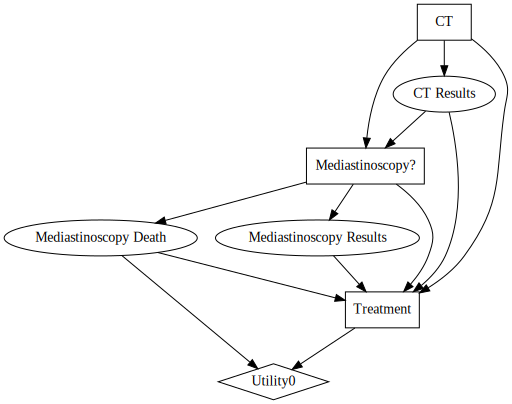

In [18]:
model.viz()

In [17]:
model = ai.remove_chance_node(model, i)

Max EU at iteration 0: 2.093077224
Starting simulation...
Max EU at the end: 3.3930543844800005
End simulation: time spend = 10.387110233306885
Best: [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1]
Optimal strategy: [CT 
(0,) -> 1
(1,) -> 0
, Treatment CT Results Mediastinoscopy Results Mediastinoscopy Death CT Mediastinoscopy? 
(0, 0, 0, 0, 0, 0) -> 0
(0, 0, 0, 0, 0, 1) -> 0
(0, 0, 0, 0, 1, 0) -> 1
(0, 0, 0, 0, 1, 1) -> 0
(0, 0, 0, 1, 0, 0) -> 1
(0, 0, 0, 1, 0, 1) -> 1
(0, 0, 0, 1, 1, 0) -> 0
(0, 0, 0, 1, 1, 1) -> 1
(0, 0, 1, 0, 0, 0) -> 0
(0, 0, 1, 0, 0, 1) -> 0
(0, 0, 1, 0, 1, 0) -> 0
(0, 0, 1, 0, 1, 1) -> 0
(0, 0, 1, 1, 0, 0) -> 0
(0, 0, 1, 1, 0, 1) -> 1
(0, 0, 1, 1, 1, 0) -> 1
(0, 0, 1, 1, 1, 1) -> 1
(0, 0, 2, 0, 0, 0) -> 0
(0, 0, 2, 0, 0, 1) -> 1
(0, 0, 2, 0, 1, 0) -> 0
(0, 0, 2, 0, 1, 1) -> 1

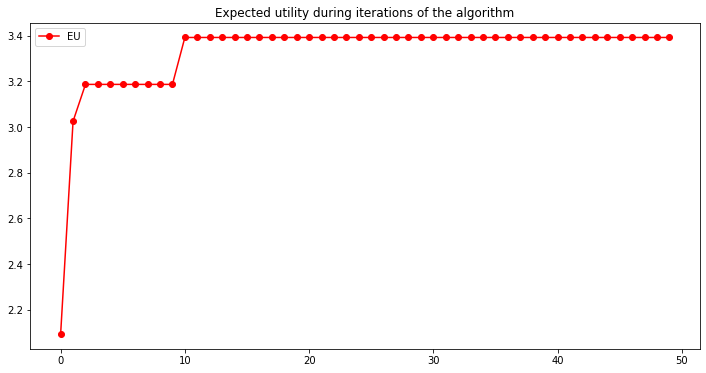

In [11]:
from mypgm.approximated import heuristicID
# logically, it requires more epochs to find the exact sol! the ID is huger
h = heuristicID(dg, [dF, dG, dH])
h.run_algorithm(max_epochs = 50, mut=0.9, population_size = 4, crossp=0.8)

In [9]:
eu = ExpectedUtility(dg)

In [10]:
eu.expected_utility([ai.decisions[0], ai.decisions[1], ai.decisions[2]])

3.3978492000000005